# Blog - Week 3 (07/07/20)


#### Kepler Zoo plot was successfully generated using the radvel code (shown below). Eccentricity and argument of periapsis were manipulated to develop intuition for RV curves for various systems. Some notes:

- Increasing the eccentricity narrows and heightens the "peaks" of the curve. All values are also shifted more positively on the y-axis. The area under the curve seems to remain constant if half amplitude is held constant. This suggests that the total radial displacement is conserved.

- Varying omega only amounts to varying the phase. The shape of the curve is conserved as it is simply translated on the x-axis.

#### Meeting with Lee Thursday 07/09/20

- Omega is the same as argument of periapsis. The range is 0 to 2pi, that is why the maximum is around 6.3 in the radvel code.

- secosw is square rt. of e times cos(w). sesinw is ' ' sin(w). These are parameters in other basis sets that use Tc instead of Tp. Only the synth basis set uses Tp, and this is the set used for the Zepler Zoo plot. Think of the synth basis as the more "physical" set with more "objective" parameters. e and w are separate in the synth set and not degenerate as in the others with secosw and sesinw. The other sets can be useful for two main reasons:
    - One reason is when working with transiting planets, you almost always want to use Tc instead of Tp, because Tc is by definition the time of transit. Also, you don't have Tp or omega for transiting planets - easier to fit with Tc.
    - A second reason is that noisy data biases eccentricity to higher values. e is constrained to values of 0 - 1 in the models. e is a uniform prior ("flat" prior), meaning that we assume all values of e, 0 - 1, are equally likely when calculating the likelihood. It's true that many planets have e = 0 or very close to 0 (as in our own system). However, you can't have a Gaussian (the posterior is Gaussian) centered on zero if negative values are not allowed, and there's simply more sample space above 0. This biases the values up. But using secosw and sesinw, you can square them and ass them to get e, and this method avoids biasing e through priors (but it's still biased by noise).
    
- Initial parameter guess is the result of the likelihood optimization. It's the "initial guess" for the MCMC walk (the starting point). For the likelihood optimization, the derivative of the curve is taken over and over until it's found to be zero (at the top of the distribution of paramter values), and that is the parameter value in the posterior.

- The purpose of MCMC walks is to determine the uncertainty of posterior values that come from the likelihood fit (the chi-squared fit - same thing).

#### Next steps:

- Complete Hogg tutorials to better understand the statistics behind radvel and Bayesian inference.

- Install RV Search and tinker.

- Long-term goal: Use RV Search to look for planets and push the tool to its limits to better understand the gray area between scenarios in which it works well and those in which it doesn't. Think about writing a report by the end of the summer on this.

In [1]:
import pdb
from math import log10, floor

import numpy as np
import scipy.optimize as op
import scipy.special as spec
from scipy import stats
from scipy import io
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator, LogFormatter, ScalarFormatter

import seaborn as sns
import corner

import astropy
from astropy import stats as astrostats
from astropy.timeseries import LombScargle

import emcee
import radvel
from radvel.plot import orbit_plots, mcmc_plots

%matplotlib inline

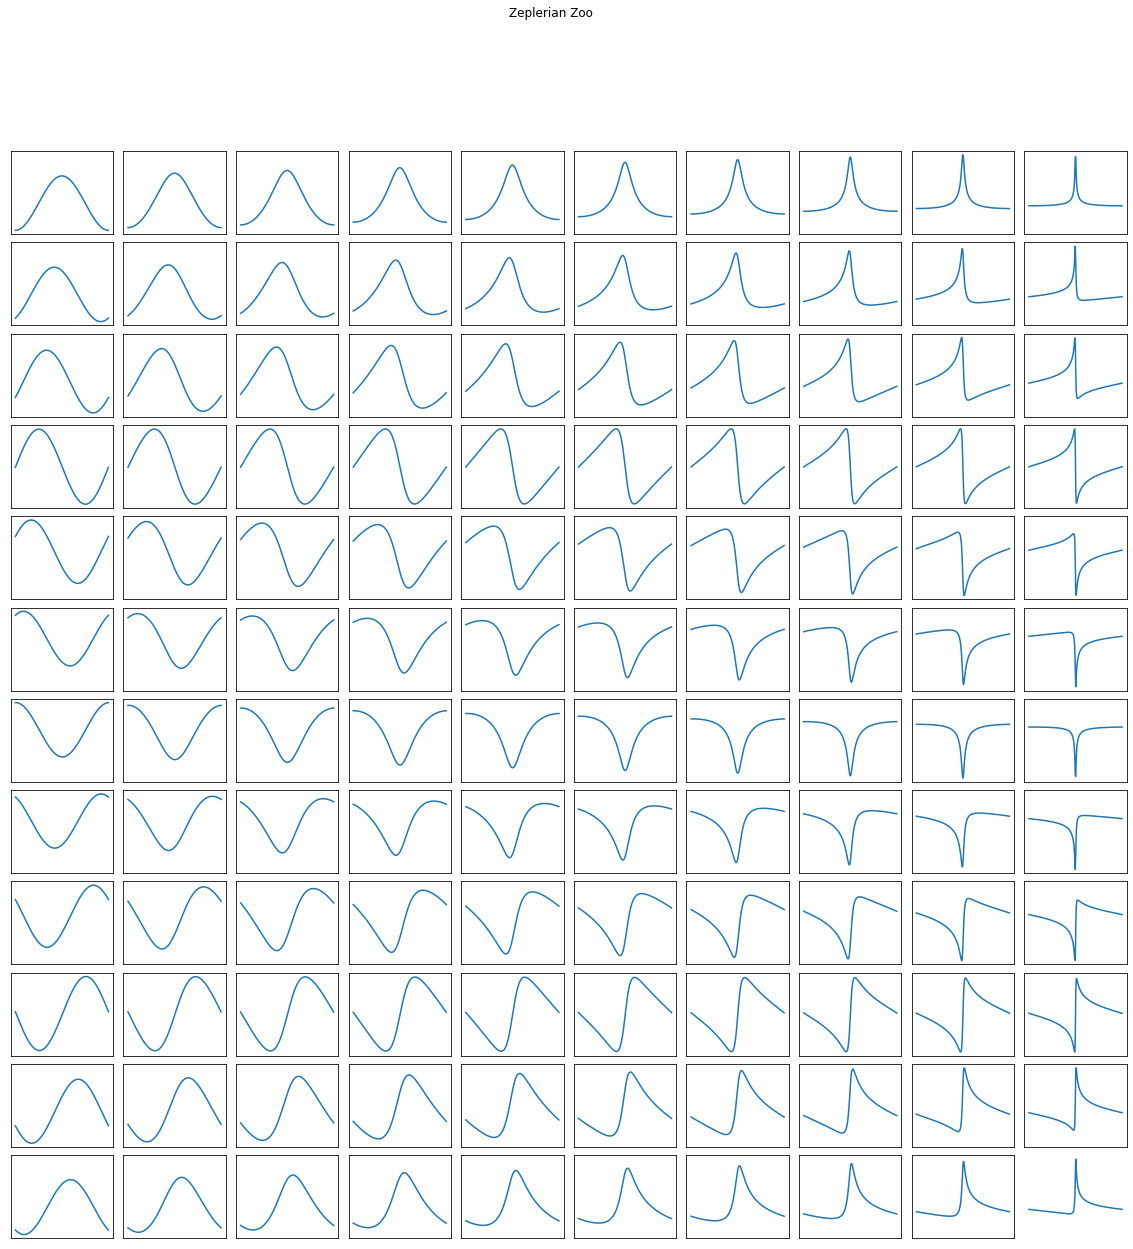

In [2]:
fig, axs = plt.subplots(12, 10, figsize = (20,20), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
fig.suptitle('Zeplerian Zoo')
#ax0 = fig.add_axes([0, 1, 10, 10], ylim = (-30, 360), xlim = (-0.1, 1.0))
plt.axis('off')

e_steps = np.linspace(0, 0.9, 10)
w_steps = np.linspace(0, 5.7, 12)

orbels = []

# Creates a list of all orbital parameters for each plot, left to right, top to bottom
for i in range(12):
    for j in range(10):
        orbels.append([100, 50, e_steps[j], w_steps[i], 20])

times = np.linspace(0, 100, 200)
rvmods = []

# Creates a list of all RV models for plotting
for i in range(120):
    rvmods.append(radvel.kepler.rv_drive(times, orbels[i]))

j=0
    
for i in range(12):
    for ax in axs[i]:
        ax.plot(times,rvmods[j])
        ax.set_xticks([])
        ax.set_yticks([])
        j = j + 1
        
fig.savefig('Kepler_Zoo.pdf', bbox_inches='tight')